m = 5, n = 1


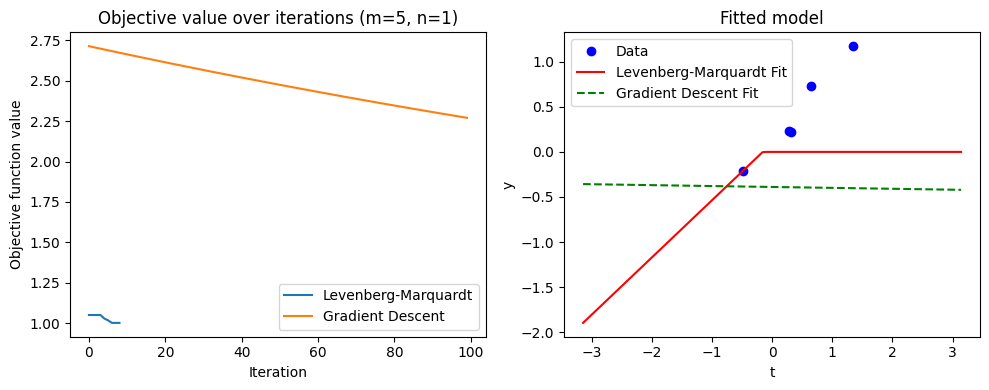

m = 5, n = 5


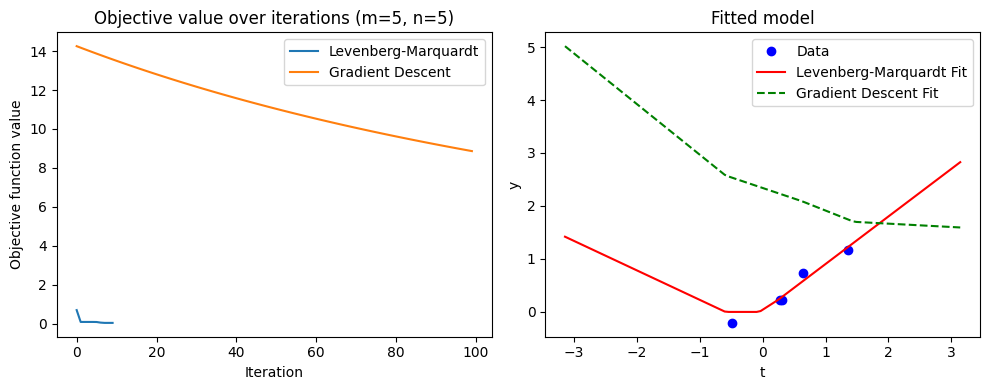

m = 5, n = 100


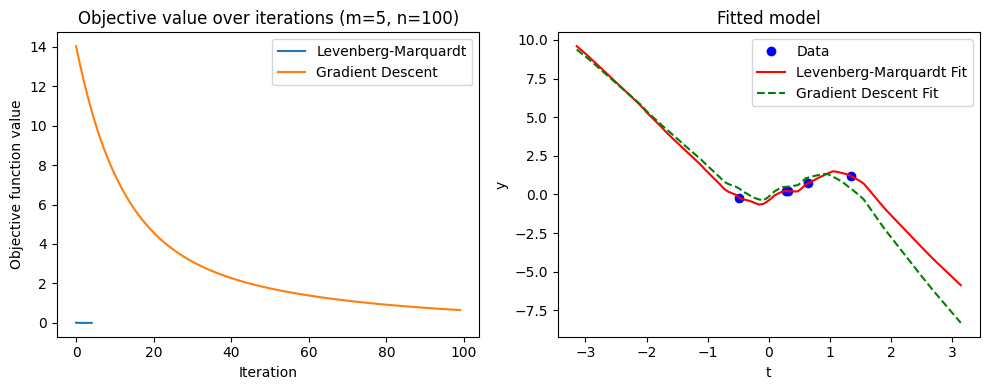

m = 5, n = 500


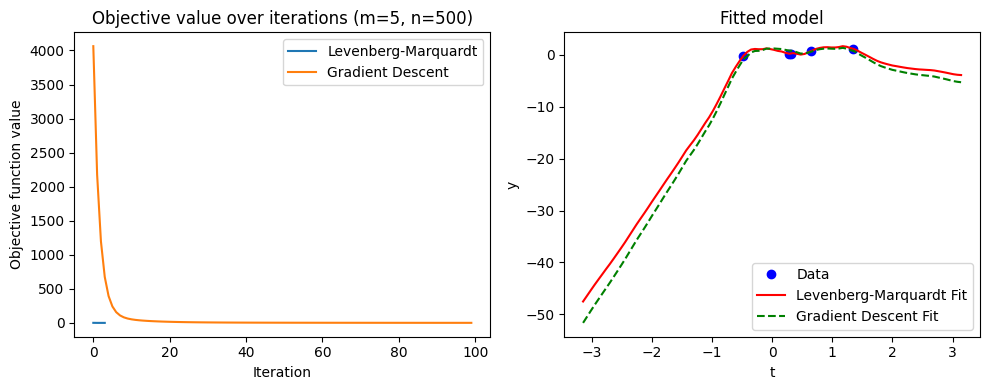

m = 10, n = 1


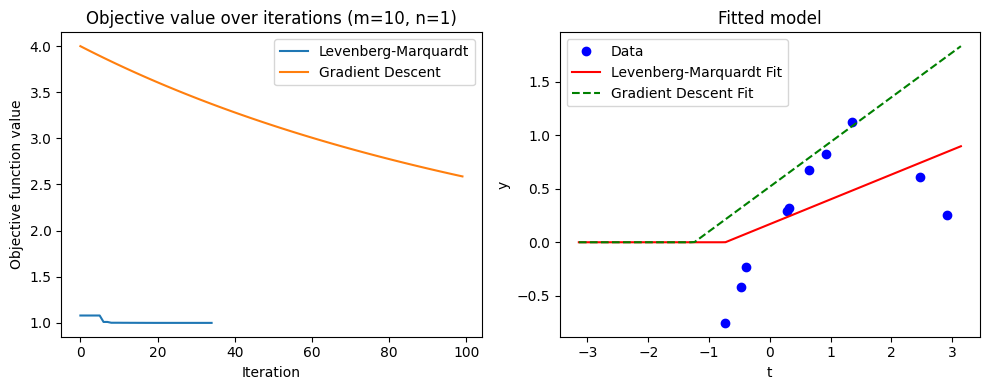

m = 10, n = 5


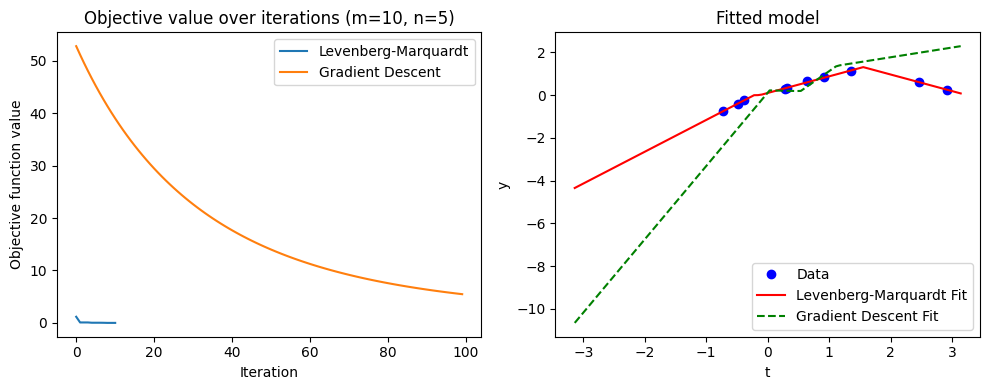

m = 10, n = 100


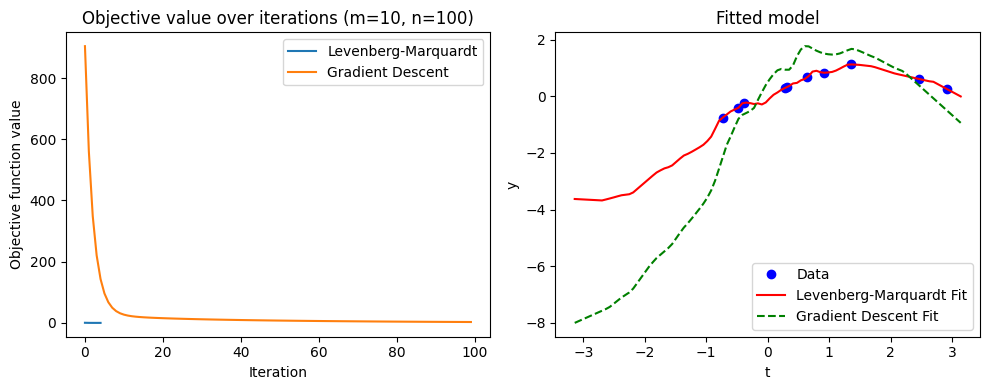

m = 10, n = 500


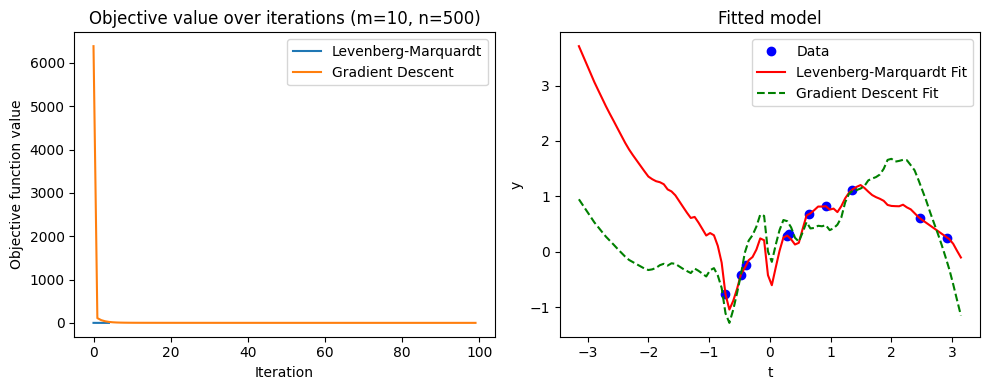

m = 100, n = 1


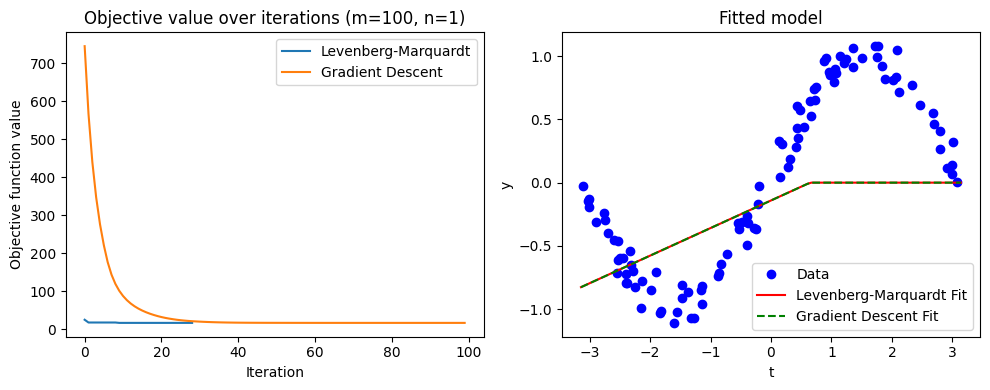

m = 100, n = 5


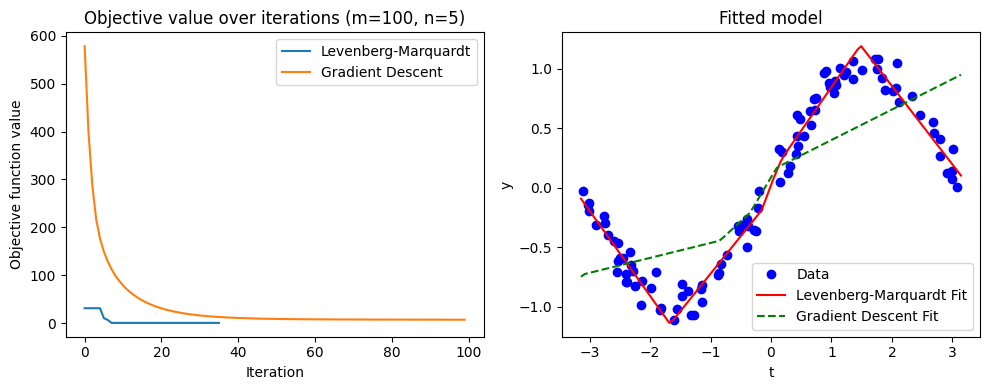

m = 100, n = 100


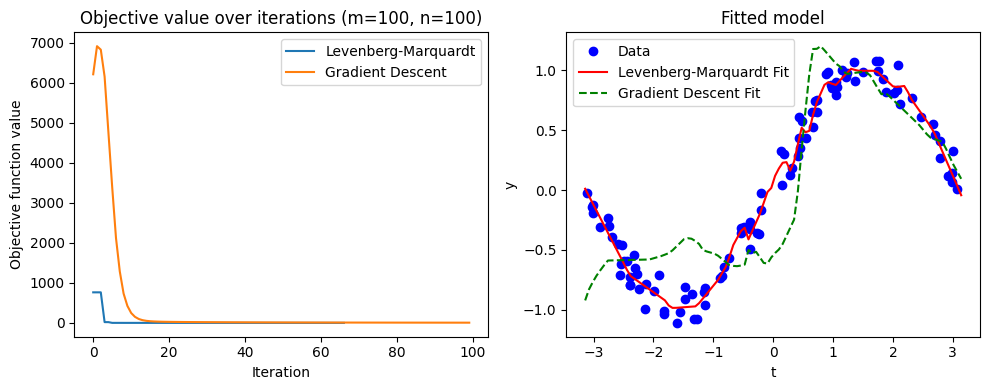

m = 100, n = 500


<ipython-input-14-e7eb1a38158a>:87: RuntimeWarning: overflow encountered in square
  losses.append(0.5 * np.sum(res ** 2))
<ipython-input-14-e7eb1a38158a>:19: RuntimeWarning: overflow encountered in multiply
  return np.sum(a * relu(w * t[:, np.newaxis] + b), axis=1)
<ipython-input-14-e7eb1a38158a>:85: RuntimeWarning: invalid value encountered in matmul
  grad = J.T @ res


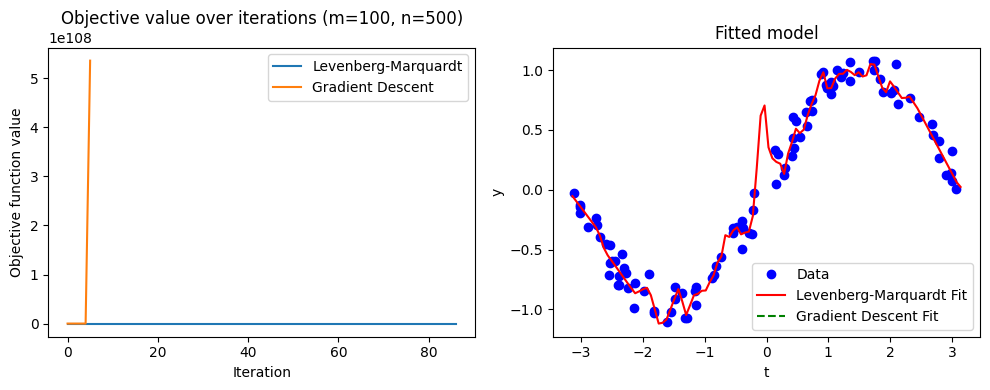

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset generation with target function y = sin(t)
def generate_data(m):
    np.random.seed(0)
    t = np.random.uniform(-np.pi, np.pi, m)
    y = np.sin(t) + np.random.normal(0, 0.1, m)  # target values with slight noise
    return t, y

# Define the ReLU neural network model
def relu(x):
    return np.maximum(x, 0)

def shallow_relu_nn(t, x, n):
    a = x[:n]
    w = x[n:2*n]
    b = x[2*n:]
    return np.sum(a * relu(w * t[:, np.newaxis] + b), axis=1)

# Define the residual and Jacobian
def residuals(t, y, x, n):
    return shallow_relu_nn(t, x, n) - y

def jacobian(t, x, n):
    m = len(t)
    a = x[:n]
    w = x[n:2*n]
    b = x[2*n:]
    J = np.zeros((m, 3 * n))

    for i in range(m):
        for j in range(n):
            r = w[j] * t[i] + b[j]
            if r > 0:
                J[i, j] = relu(r)  # derivative wrt a_j
                J[i, n + j] = a[j] * t[i]  # derivative wrt w_j
                J[i, 2 * n + j] = a[j]     # derivative wrt b_j
    return J

# Levenberg-Marquardt method
def levenberg_marquardt(t, y, x, n, max_iter=100, tol=1e-5, lambda_init=1e-3, lambda_factor=10):
    lambda_reg = lambda_init
    losses = []

    for k in range(max_iter):
        res = residuals(t, y, x, n)
        J = jacobian(t, x, n)
        grad = J.T @ res
        hessian_approx = J.T @ J + lambda_reg * np.eye(J.shape[1])  # Regularized Hessian

        # Update step
        try:
            delta_x = np.linalg.solve(hessian_approx, grad)
        except np.linalg.LinAlgError:
            print("Singular matrix encountered. Stopping iteration.")
            break

        new_x = x - delta_x
        new_res = residuals(t, y, new_x, n)
        new_loss = 0.5 * np.sum(new_res ** 2)
        old_loss = 0.5 * np.sum(res ** 2)

        # Decide if we accept the new parameters
        if new_loss < old_loss:
            x = new_x
            lambda_reg /= lambda_factor
            losses.append(new_loss)
        else:
            lambda_reg *= lambda_factor
            losses.append(old_loss)

        if np.linalg.norm(delta_x) < tol:
            break

    return x, losses

# Gradient Descent method
def gradient_descent(t, y, x, n, max_iter=100, tol=1e-5, lr=0.0001):
    losses = []

    for k in range(max_iter):
        res = residuals(t, y, x, n)
        J = jacobian(t, x, n)
        grad = J.T @ res
        x -= lr * grad
        losses.append(0.5 * np.sum(res ** 2))

        if np.linalg.norm(lr * grad) < tol:
            break

    return x, losses

# Test the effect of network size and dataset size
for m in [5, 10, 100]:
    for n in [1, 5, 100, 500]:
        print("="*20)
        print(f"m = {m}, n = {n}")

        # Initialize parameters
        initial_x = np.random.randn(3 * n)
        t, y = generate_data(m)

        # Run Levenberg-Marquardt and Gradient Descent
        x_lm, losses_lm = levenberg_marquardt(t, y, initial_x.copy(), n)
        x_gd, losses_gd = gradient_descent(t, y, initial_x.copy(), n)

        # Plot results
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(losses_lm, label="Levenberg-Marquardt")
        plt.plot(losses_gd, label="Gradient Descent")
        plt.xlabel("Iteration")
        plt.ylabel("Objective function value")
        plt.title(f"Objective value over iterations (m={m}, n={n})")
        plt.legend()

        plt.subplot(1, 2, 2)
        t_vals = np.linspace(-np.pi, np.pi, 100)
        plt.plot(t, y, 'bo', label="Data")
        plt.plot(t_vals, shallow_relu_nn(t_vals, x_lm, n), 'r-', label="Levenberg-Marquardt Fit")
        plt.plot(t_vals, shallow_relu_nn(t_vals, x_gd, n), 'g--', label="Gradient Descent Fit")
        plt.xlabel("t")
        plt.ylabel("y")
        plt.title("Fitted model")
        plt.legend()

        plt.tight_layout()
        plt.show()

## When fat percentage is kept at 2%

In [5]:
from scipy.optimize import linprog

# Coefficients of the objective function (prices)
c = [2, 4, 1, 2]

# Coefficients of the inequality constraints (fiber, fat, sugar)
A_eq = [
    [0.03, 0.08, 0.16, 0.04],  # fiber
    [0.06, 0.46, 0.09, 0.09],
    [0.20, 0.05, 0.04, 0],     # sugar
    [1, 1, 1, 1]               # total weight
]

# Right-hand side of the equality constraints
b_eq = [100, 20, 50, 1000]

# Bounds for each variable (non-negativity)
x_bounds = [(0, None), (0, None), (0, None), (0, None)]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

# Print the results
print("Optimal amounts of items:", result.x)
print("Minimum cost:", result.fun)

Optimal amounts of items: None
Minimum cost: None


## If Fat percentage is relaxed to 20%

In [6]:
from scipy.optimize import linprog

# Coefficients of the objective function (prices)
c = [2, 4, 1, 2]

# Coefficients of the inequality constraints (fiber, fat, sugar)
A_eq = [
    [0.03, 0.08, 0.16, 0.04],  # fiber
    [0.06, 0.46, 0.09, 0.09],
    [0.20, 0.05, 0.04, 0],     # sugar
    [1, 1, 1, 1]               # total weight
]

# Right-hand side of the equality constraints
b_eq = [100, 200, 50, 1000]

# Bounds for each variable (non-negativity)
x_bounds = [(0, None), (0, None), (0, None), (0, None)]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

# Print the results
print("Optimal amounts of items:", result.x)
print("Minimum cost:", result.fun)
print(A_eq@ result.x)

Optimal amounts of items: [ 92.57641921 304.80349345 406.11353712 196.50655022]
Minimum cost: 2203.4934497816594
[ 100.  200.   50. 1000.]


## Fat contribution does not matter

In [7]:
from scipy.optimize import linprog

# Coefficients of the objective function (prices)
c = [2, 4, 1, 2]

# Coefficients of the inequality constraints (fiber, fat, sugar)
A_eq = [
    [0.03, 0.08, 0.16, 0.04],  # fiber
    [0.20, 0.05, 0.04, 0],     # sugar
    [1, 1, 1, 1]               # total weight
]

# Right-hand side of the equality constraints
b_eq = [100, 50, 1000]

# Bounds for each variable (non-negativity)
x_bounds = [(0, None), (0, None), (0, None), (0, None)]

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=x_bounds, method='highs')

# Print the results
print("Optimal amounts of items:", result.x)
print("Minimum cost:", result.fun)
print(A_eq@ result.x)

Optimal amounts of items: [147.54098361   0.         512.29508197 340.16393443]
Minimum cost: 1487.7049180327867
[ 100.   50. 1000.]


## Transmitter Problem

In [2]:
import numpy as np
from scipy.optimize import linprog

# Parameters
n = 5  # Number of transmitters
m = 10  # Number of locations
P = 1  # Minimum power requirement at each location

# Generate random values for g_{i,j}
# For simplicity, using random values here, or you can use 1/r^2 where r is distance
np.random.seed(42)
g = np.random.rand(m, n)

# Objective function: Minimize sum of p_j
c = np.ones(n)  # This represents sum(p_j)

# Inequality constraints: G*p >= P for all i
A = -g  # We negate g to use it in <= form
b = -P * np.ones(m)  # The right-hand side of each inequality is -P

# Bounds for p_j: p_j >= 0
bounds = [(0, None)] * n

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Print the results
if result.success:
    print("Optimal transmit powers:", result.x)
    print("Minimum total power:", result.fun)
else:
    print("No feasible solution found.")

Optimal transmit powers: [0.64047229 0.0681051  0.8653112  0.94395446 0.        ]
Minimum total power: 2.517843050923657


In [1]:
import numpy as np
from scipy.optimize import linprog

# Parameters
n = 1000  # Number of transmitters
m = 1000  # Number of locations
P = 5  # Minimum power requirement at each location

# Generate random values for g_{i,j}
# For simplicity, using random values here, or you can use 1/r^2 where r is distance
np.random.seed(42)
g = np.random.rand(m, n)

# Objective function: Minimize sum of p_j
c = np.ones(n)  # This represents sum(p_j)

# Inequality constraints: G*p >= P for all i
A = -g  # We negate g to use it in <= form
b = -P * np.ones(m)  # The right-hand side of each inequality is -P

# Bounds for p_j: p_j >= 0
bounds = [(0, None)] * n

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Print the results
if result.success:
    print("Optimal transmit powers:", result.x)
    print("Minimum total power:", result.fun)
else:
    print("No feasible solution found.")

Optimal transmit powers: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.88030994e-02 0.00000000e+00 4.99820778e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.21956350e-03
 2.67214959e-02 0.00000000e+00 0.00000000e+00 4.19526637e-02
 2.28593343e-02 0.00000000e+00 0.00000000e+00 9.03543239e-03
 1.33198141e-02 0.00000000e+00 0.00000000e+00 1.44670238e-02
 0.00000000e+00 2.82032174e-06 0.00000000e+00 0.00000000e+00
 6.70971763e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.95518251e-02 3.47935599e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.04739204e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.62929671e-02
 0.00000000e+00 2.21006078e-02 1.76478943e-02 0.00000000e+00
 3.14972338e-02 0.00000000e+00 2.91209001e-02 1.20758884e-02
 2.46687414e-04 0.00000000e+00 2.28385395e-02 1.74538085e-02
 1.36036449e-02 2.78774116e-02 3.88522967e-04 0.00000000e+00
 2.90129412e-02 3.17431626e-02 2.41625774e-02 1.97534290e-02